In [275]:
# Import the necessary packages and import the excel file as a data frame. Show the data frame
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# Use this link if you do not have the Excel doc saved locally
#df= pd.read_excel("https://files.nc.gov/dpi/documents/accountability/reporting/spg-report2019_october.xlsx", skip_rows = 2)
df = pd.read_excel("NC_School_Grades.xlsx", 'School Performance Grades', skiprows = 2)
df.head()

,District Name,School\nCode,School Name,State Board\nRegion,Grade Span,Title I Served School,Percent EDS,Missed Days due to Hurricane Florence,School Performance \nGrade\n(SPG),School Performance\nScore\n(SPS),...,School Growth\nScore\n(SG),School Growth\nStatus,School Growth\nIndex,Academic Assessments Score\n(Reading and Mathematics EOG/EOC),Science EOG\nScore,English Learner Progress Score,4-Year\nCohort\nGraduation\nRate Score,Biology\nEOC Score,ACT/ACT WorkKeys Assessments Score,Passing\nNC Math 3 Course Score
0,Alamance-Burlington Schools,010303,ABSS Early College at ACC,Piedmont-Triad,09-13,NaN,43.8,1.0,A,88.0,...,80.3,Met,0.15,84.2,NaN,NaN,NaN,>95,87.2,>95
1,Alamance-Burlington Schools,010304,Alexander Wilson Elementary,Piedmont-Triad,PK-05,NaN,49.8,1.0,C,63.0,...,76.6,Met,-0.68,59.9,57.9,62.5,NaN,NaN,NaN,NaN
2,Alamance-Burlington Schools,010308,Altamahaw-Ossipee Elementary,Piedmont-Triad,0K-05,NaN,46.8,1.0,C,67.0,...,84.0,Met,1.62,61.3,70.1,NaN,NaN,NaN,NaN,NaN
3,Alamance-Burlington Schools,010310,Broadview Middle,Piedmont-Triad,06-08,Y,55.3,1.0,F,34.0,...,55.7,Not Met,-6.53,28.1,41.3,11,NaN,NaN,NaN,NaN
4,Alamance-Burlington Schools,010311,Career and Technical Education Center,Piedmont-Triad,09-12,NaN,*,1.0,I,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
# First Transformation: Remove all of the newline characters from the column names to make them more readable
df.columns = df.columns.str.replace("[\n]", " ")
df.head()

,District Name,School Code,School Name,State Board Region,Grade Span,Title I Served School,Percent EDS,Missed Days due to Hurricane Florence,School Performance Grade (SPG),School Performance Score (SPS),...,School Growth Score (SG),School Growth Status,School Growth Index,Academic Assessments Score (Reading and Mathematics EOG/EOC),Science EOG Score,English Learner Progress Score,4-Year Cohort Graduation Rate Score,Biology EOC Score,ACT/ACT WorkKeys Assessments Score,Passing NC Math 3 Course Score
0,Alamance-Burlington Schools,010303,ABSS Early College at ACC,Piedmont-Triad,09-13,NaN,43.8,1.0,A,88.0,...,80.3,Met,0.15,84.2,NaN,NaN,NaN,>95,87.2,>95
1,Alamance-Burlington Schools,010304,Alexander Wilson Elementary,Piedmont-Triad,PK-05,NaN,49.8,1.0,C,63.0,...,76.6,Met,-0.68,59.9,57.9,62.5,NaN,NaN,NaN,NaN
2,Alamance-Burlington Schools,010308,Altamahaw-Ossipee Elementary,Piedmont-Triad,0K-05,NaN,46.8,1.0,C,67.0,...,84.0,Met,1.62,61.3,70.1,NaN,NaN,NaN,NaN,NaN
3,Alamance-Burlington Schools,010310,Broadview Middle,Piedmont-Triad,06-08,Y,55.3,1.0,F,34.0,...,55.7,Not Met,-6.53,28.1,41.3,11,NaN,NaN,NaN,NaN
4,Alamance-Burlington Schools,010311,Career and Technical Education Center,Piedmont-Triad,09-12,NaN,*,1.0,I,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
# Print out a list of all of the columns names to analyze and see which ones to keep
df.columns

Index(['District Name', 'School Code', 'School Name', 'State Board Region',
       'Grade Span', 'Title I Served School', 'Percent EDS',
       'Missed Days due to Hurricane Florence',
       'School Performance  Grade (SPG)', 'School Performance Score (SPS)',
       'School Achievement Score (SA)', 'School Growth Score (SG)',
       'School Growth Status', 'School Growth Index',
       'Academic Assessments Score (Reading and Mathematics EOG/EOC)',
       'Science EOG Score', 'English Learner Progress Score',
       '4-Year Cohort Graduation Rate Score', 'Biology EOC Score',
       'ACT/ACT WorkKeys Assessments Score', 'Passing NC Math 3 Course Score'],
      dtype='object')

In [278]:
# Second Transformation: Keep only the columns needed for analysis. Reorder the columns to make more readable
df = df[['School Name','School Code','District Name','State Board Region','Grade Span','Title I Served School',
         'School Performance  Grade (SPG)','School Performance Score (SPS)','School Achievement Score (SA)',
         'School Growth Score (SG)']]
df.head()

,School Name,School Code,District Name,State Board Region,Grade Span,Title I Served School,School Performance Grade (SPG),School Performance Score (SPS),School Achievement Score (SA),School Growth Score (SG)
0,ABSS Early College at ACC,010303,Alamance-Burlington Schools,Piedmont-Triad,09-13,NaN,A,88.0,90.4,80.3
1,Alexander Wilson Elementary,010304,Alamance-Burlington Schools,Piedmont-Triad,PK-05,NaN,C,63.0,59.7,76.6
2,Altamahaw-Ossipee Elementary,010308,Alamance-Burlington Schools,Piedmont-Triad,0K-05,NaN,C,67.0,62.5,84.0
3,Broadview Middle,010310,Alamance-Burlington Schools,Piedmont-Triad,06-08,Y,F,34.0,28.9,55.7
4,Career and Technical Education Center,010311,Alamance-Burlington Schools,Piedmont-Triad,09-12,NaN,I,NaN,NaN,NaN


In [279]:
# Identify which columns have NaN's and investigate why
df.isna().sum()

School Name                           0
School Code                           0
District Name                         0
State Board Region                    0
Grade Span                            0
Title I Served School              1162
School Performance  Grade (SPG)       3
School Performance Score (SPS)      111
School Achievement Score (SA)       150
School Growth Score (SG)            166
dtype: int64

In [280]:
# Title 1 Served School has NaN's becuase in the original data there is blanks insteads of N or No
# Third Transformation: Rename the NaN's to N in the Title 1 Served School column for more accurate analysis
df["Title I Served School"] = df["Title I Served School"].fillna('N')
df.isna().sum()

School Name                          0
School Code                          0
District Name                        0
State Board Region                   0
Grade Span                           0
Title I Served School                0
School Performance  Grade (SPG)      3
School Performance Score (SPS)     111
School Achievement Score (SA)      150
School Growth Score (SG)           166
dtype: int64

In [281]:
# Show all the values and their counts for school grade in the SPG column
df['School Performance  Grade (SPG)'].value_counts().sort_index()

A       203
ALT      94
B       745
C      1044
D       460
F        91
I        14
Name: School Performance  Grade (SPG), dtype: int64

In [282]:
# The result shows that there are two grades, ALT and I, that are not normal A-F ranking
# ALT = and alternative school and I = Insufficient Data
# Fourth Transformation:remove the ALT and I schools from the dataset as they do not fit the analysis
df.drop(df[df['School Performance  Grade (SPG)'] == 'I'].index, inplace = True)
df.drop(df[df['School Performance  Grade (SPG)'] == 'ALT'].index, inplace = True)
df['School Performance  Grade (SPG)'].value_counts().sort_index()

A     203
B     745
C    1044
D     460
F      91
Name: School Performance  Grade (SPG), dtype: int64

In [283]:
# There are three NaN's for SPG. After further analysis, these three schools are for Deaf and Blind Schools and
# must not take the state testing to have a SPG
df_spg_na = df[df['School Performance  Grade (SPG)'].isnull()]
df_spg_na

,School Name,School Code,District Name,State Board Region,Grade Span,Title I Served School,School Performance Grade (SPG),School Performance Score (SPS),School Achievement Score (SA),School Growth Score (SG)
627,Eastern NC School for the Deaf,298202,Deaf and Blind Schools,North Central,0K-12,N,NaN,NaN,NaN,NaN
628,Gov. Morehead School f/t Blind,298203,Deaf and Blind Schools,North Central,0K-12,N,NaN,NaN,NaN,NaN
629,NC School for the Deaf,298204,Deaf and Blind Schools,North Central,PK-12,N,NaN,NaN,NaN,NaN


In [284]:
#These schools will be exlcuded for this analysis as we are looking at schools with SPG grades
#Fifth Transformation: Drop the three schools that have SPGs as NaN
df = df.dropna(subset=['School Performance  Grade (SPG)'])
df.isna().sum()

School Name                         0
School Code                         0
District Name                       0
State Board Region                  0
Grade Span                          0
Title I Served School               0
School Performance  Grade (SPG)     0
School Performance Score (SPS)      0
School Achievement Score (SA)      39
School Growth Score (SG)           55
dtype: int64

In [285]:
list_of_cols = list(df.columns)
# create a function that iterates over a list and adds data and their counts to a dictionary
def getDuplicatesWithCount(listOfElems):
    ''' Get frequency count of duplicate elements in the given list '''
    dictOfElems = dict()
    # Iterate over each element in list
    for elem in listOfElems:
        # If element exists in dict then increment its value else add it in dict
        if elem in dictOfElems:
            dictOfElems[elem] += 1
        else:
            dictOfElems[elem] = 1    
 
    # Filter key-value pairs in dictionary. Keep pairs whose value is greater than 1 
    # i.e. only duplicate elements from list.
    dictOfElems = { key:value for key, value in dictOfElems.items() if value > 1}
    # Returns a dict of duplicate elements and thier frequency count
    return dictOfElems

# Create a function that says if there are not duplicates in a column or identifies how many duplicates and what
# word is duplicated how many times
def printDuplicates(col_name):
    empty_dict = {} 
    for col in list_of_cols:
        dictOfElems = getDuplicatesWithCount(col_name)
    
    if dictOfElems == empty_dict:
        print("No Duplicates")
    else:
        for key, value in dictOfElems.items():
                print(key , ' :: ', value)

In [286]:
# Check to see if there are any duplicate schools by school code. This is the only important column that should
# not be duplicated
printDuplicates(df['School Code'])

No Duplicates


{'whiskers': [<matplotlib.lines.Line2D at 0x1274225d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1274220d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2e598850>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2f635090>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a293b8250>],
 'means': []}

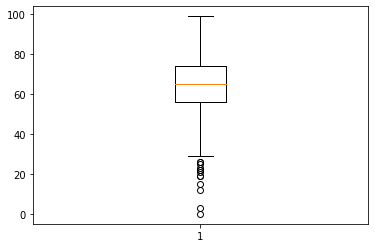

In [287]:
# Create a boxplot to idenitify outliers for SPS
plt.boxplot(df['School Performance Score (SPS)'])

In [288]:
# The boxplot shows there are some values that could potentially be outliers
# Create an array containing the z scores for each value in the SPS column
z_score = stats.zscore(df['School Performance Score (SPS)'])
# Create a data frame with a new column z_score to investigate the outliers further
# An outlier is any SPS score that has a z score greater than 3 or less than -3.
df_outlier_test = df
df_outlier_test['z_score'] = z_score
df_outlier_test = df_outlier_test[df_outlier_test['z_score'] < -3]

def plural_outliers(count):
    if count == 1:
        x ='outlier'
    else:
        x = 'outliers'
    return x

outlier_count = df_outlier_test.shape[0]
# The number of rows in the new data frames would be the number of outliers
print("There is",outlier_count,plural_outliers(outlier_count),'in this dataset')

There is 10 outliers in this dataset


In [289]:
# Investigate the outliers further
df_outlier_test

,School Name,School Code,District Name,State Board Region,Grade Span,Title I Served School,School Performance Grade (SPG),School Performance Score (SPS),School Achievement Score (SA),School Growth Score (SG),z_score
77,Avery High Viking Academy,060701,Avery County Schools,Northwest,09-09,N,F,23.0,10.5,71.5,-3.059047
944,Doris Henderson Newcomers Sch,410398,Guilford County Schools,Piedmont-Triad,03-12,Y,F,0.0,0.0,NaN,-4.735385
1573,CITI High School,640342,Nash-Rocky Mount Schools,North Central,09-10,Y,F,15.0,4.9,57.6,-3.642121
1780,Vidant Health,740378,Pitt County Schools,Northeast,PK-12,N,F,12.0,11.8,NaN,-3.860774
2467,ECU Community School,74Z000,Lab Schools,Northeast,0K-05,Y,F,22.0,6.8,84.9,-3.131931
2468,Moss Street Partnership School,79Z000,Lab Schools,Piedmont-Triad,0K-05,Y,F,21.0,14.2,50.0,-3.204816
2475,Grandfather Academy,06A000,Charter Schools,Northwest,01-12,Y,F,3.0,3.2,NaN,-4.516732
2478,Three Rivers Academy,08A000,Charter Schools,Northeast,0K-07,Y,F,19.0,8.6,59.6,-3.350584
2584,UpROAR Leadership Academy,61U000,Charter Schools,Southwest,05-09,Y,F,19.0,7.2,64.9,-3.350584
2611,Essie Mae Kiser Foxx Charter,80B000,Charter Schools,Southwest,0K-04,Y,F,22.0,9.5,73.6,-3.131931


In [290]:
# Sixth Transformation: Without having a lot of domain knowledge, the only school I am comfortable 
# considering an outlier and dropping from the dataset is school code 410398. This school has a SPS of 0 
# and that should be excluded.
df.drop(df[df['School Code'] == 410398].index, inplace = True)